In [1]:
%matplotlib inline
from os.path import join

import numpy as np
from nilearn.plotting import plot_stat_map

import nimare

/Users/tsalo/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%%time
database_file = '/Users/tsalo/Documents/tsalo/NiMARE/nimare/tests/data/dset.json'
db = nimare.dataset.Database(database_file)
ds = db.get_dataset()
ids = ds.ids
idx = ids.index('9620698-1')

CPU times: user 44 ms, sys: 4.98 ms, total: 49 ms
Wall time: 48.4 ms


/Users/tsalo/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tsalo/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [3]:
%%time
kernel = nimare.meta.cbma.MKDAKernel(ds.coordinates, ds.mask)
mkda_res = kernel.transform(ids=ids, r=15)

CPU times: user 1.73 s, sys: 129 ms, total: 1.86 s
Wall time: 1.79 s


In [4]:
%%time
kernel = nimare.meta.cbma.KDAKernel(ds.coordinates, ds.mask)
kda_res = kernel.transform(ids=ids, r=15)

CPU times: user 1.86 s, sys: 132 ms, total: 1.99 s
Wall time: 1.93 s


In [5]:
%%time
# 301 ms
kernel = nimare.meta.cbma.ALEKernel(ds.coordinates, ds.mask)
ale_res = kernel.transform(ids=ids, n=20)

CPU times: user 161 ms, sys: 63.1 ms, total: 224 ms
Wall time: 233 ms


In [6]:
from nimare.utils import vox2mm
import pandas as pd

# MA map peak coordinates
data = ale_res[idx].get_data()
ijk = np.vstack(np.where(data==np.max(data))).T
xyz = vox2mm(ijk.astype(int), ds.mask.affine).astype(int)
temp_df = pd.DataFrame(xyz, columns=['x', 'y', 'z'])
print temp_df.sort_values(by=['x', 'y', 'z']).values

# Dataset coordinates
temp_df2 = ds.coordinates.loc[ds.coordinates['id']=='9620698-1']
temp_df2 = temp_df2[['x', 'y', 'z']].astype(int)
print temp_df2.sort_values(by=['x', 'y', 'z']).values

[[-43  -4  -7]
 [-27  -4  58]
 [-23  -4  40]
 [-19  -4  21]
 [-18  -4   8]
 [-17  -4 -11]
 [-14  -4 -19]
 [-12  -4  60]
 [ -8  -4  64]
 [ -4  -4  65]
 [ -2   3  45]
 [  2  -4  39]
 [  3  -4  38]
 [ 19  -4  64]
 [ 23   3   8]
 [ 40  -4  26]
 [ 46  -4  39]
 [ 47  -4 -10]
 [ 52   3   3]]
[[-43  -4  -7]
 [-27  -4  59]
 [-23  -4  41]
 [-19  -4  22]
 [-18  -4   9]
 [-17  -4 -11]
 [-14  -4 -19]
 [-12  -4  61]
 [ -8  -4  65]
 [ -4  -4  66]
 [ -2   4  46]
 [  3  -4  40]
 [  4  -4  39]
 [ 20  -4  65]
 [ 24   4   9]
 [ 41  -4  27]
 [ 47  -4  40]
 [ 48  -4 -10]
 [ 53   4   4]]


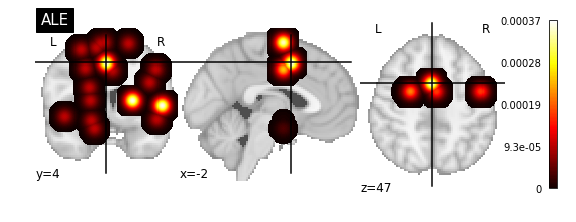

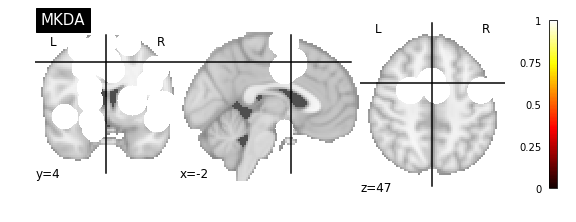

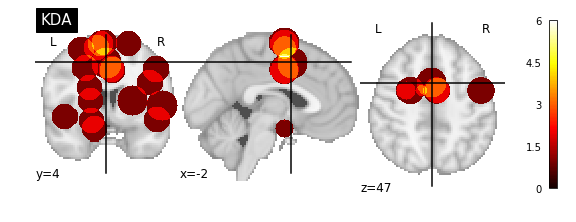

In [7]:
plot_stat_map(ale_res[idx], cut_coords=[-2, 4, 47], title='ALE')
plot_stat_map(mkda_res[idx], cut_coords=[-2, 4, 47], title='MKDA')
plot_stat_map(kda_res[idx], cut_coords=[-2, 4, 47], title='KDA')

In [11]:
%%time
mkda = nimare.meta.cbma.MKDA(ds, ids=ids[:5], ids2=ids[5:], kernel__r=15)
mkda.fit()

CPU times: user 17.7 s, sys: 2.21 s, total: 19.9 s
Wall time: 20.9 s


In [12]:
mkda.images

{'consistency_z': <nibabel.nifti1.Nifti1Image at 0x1044ccdd0>,
 'pA': <nibabel.nifti1.Nifti1Image at 0x10f272510>,
 'pAgF': <nibabel.nifti1.Nifti1Image at 0x1044e3310>,
 'pAgF_given_pF=0.50': <nibabel.nifti1.Nifti1Image at 0x1044daa50>,
 'pAgF_z_FDR_0.05': <nibabel.nifti1.Nifti1Image at 0x1044cc910>,
 'pFgA': <nibabel.nifti1.Nifti1Image at 0x1044e3790>,
 'pFgA_given_pF=0.50': <nibabel.nifti1.Nifti1Image at 0x1044daed0>,
 'pFgA_z_FDR_0.05': <nibabel.nifti1.Nifti1Image at 0x1044ccd50>,
 'specificity_z': <nibabel.nifti1.Nifti1Image at 0x1044cc410>}

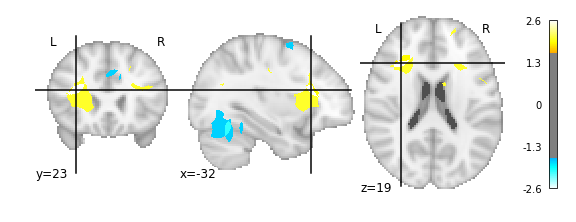

In [17]:
plot_stat_map(mkda.images['specificity_z'], threshold=1.65)